In [9]:
import numpy as np
from scipy.special import log_softmax
import pandas as pd
import matplotlib.pyplot as plt

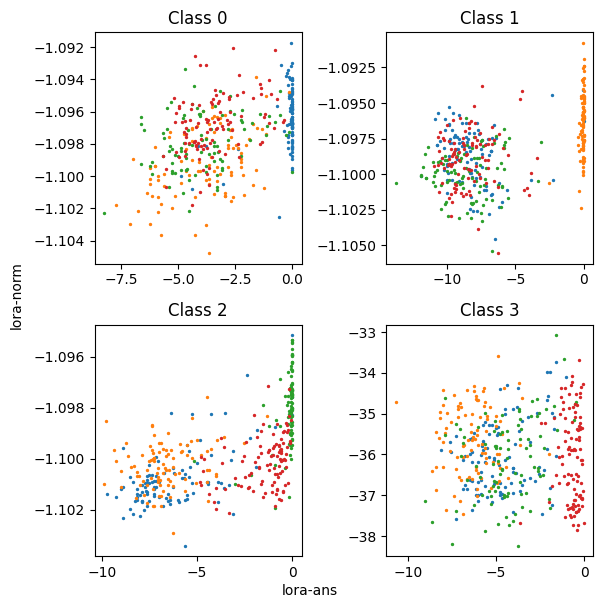

In [43]:
seed = 1
num_classes = 4
logits_ans = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/lora_ans/agnews_1024_0.3_{seed}/test=agnews/list=test_400/logits.csv", index_col=0, header=None).values.astype(float)
logits_ans = log_softmax(logits_ans, axis=1)
labels_ans = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/lora_ans/agnews_1024_0.3_{seed}/test=agnews/list=test_400/labels.csv", index_col=0, header=None).values.flatten().astype(int)
logits_norm = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/lora_norm-5/agnews_1024_0.3_{seed}/test=agnews/list=test_400/logits.csv", index_col=0, header=None).values.astype(float)
logits_norm = log_softmax(logits_norm, axis=1)
labels_norm = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/lora_norm-5/agnews_1024_0.3_{seed}/test=agnews/list=test_400/labels.csv", index_col=0, header=None).values.flatten().astype(int)

nrows = int(np.ceil(np.sqrt(num_classes)))
ncols = int(np.floor(np.sqrt(num_classes)))
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
colors = plt.cm.tab10.colors
for i in range(num_classes):
    for j in range(num_classes):
        ax[i//ncols, i%ncols].scatter(logits_ans[labels_ans == j, i], logits_norm[labels_norm == j, i], s=2, color=colors[j])
    ax[i//ncols, i%ncols].set_title(f"Class {i}")

fig.text(0.5, 0.0, 'lora-ans', ha='center')
fig.text(0.0, 0.5, 'lora-norm', va='center', rotation='vertical')


fig.tight_layout()
plt.show()

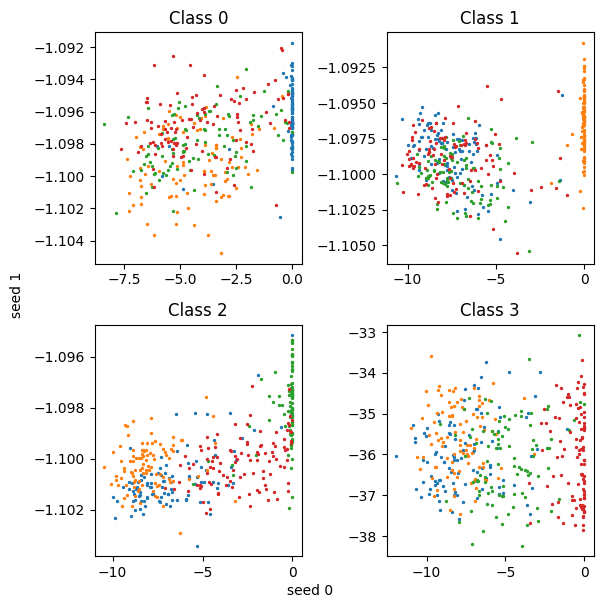

In [44]:
num_classes = 4
method = "lora_norm-5"
logits_0 = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/{method}/agnews_1024_0.3_0/test=agnews/list=test_400/logits.csv", index_col=0, header=None).values.astype(float)
logits_0 = log_softmax(logits_0, axis=1)
labels_0 = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/{method}/agnews_1024_0.3_0/test=agnews/list=test_400/labels.csv", index_col=0, header=None).values.flatten().astype(int)
logits_1 = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/{method}/agnews_1024_0.3_1/test=agnews/list=test_400/logits.csv", index_col=0, header=None).values.astype(float)
logits_1 = log_softmax(logits_1, axis=1)
labels_1 = pd.read_csv(f"../outputs/adaptation/llama3.2-1b/{method}/agnews_1024_0.3_1/test=agnews/list=test_400/labels.csv", index_col=0, header=None).values.flatten().astype(int)

nrows = int(np.ceil(np.sqrt(num_classes)))
ncols = int(np.floor(np.sqrt(num_classes)))
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
colors = plt.cm.tab10.colors
for i in range(num_classes):
    for j in range(num_classes):
        ax[i//ncols, i%ncols].scatter(logits_0[labels_0 == j, i], logits_1[labels_1 == j, i], s=2, color=colors[j])
    ax[i//ncols, i%ncols].set_title(f"Class {i}")

fig.text(0.5, 0.0, 'seed 0', ha='center')
fig.text(0.0, 0.5, 'seed 1', va='center', rotation='vertical')


fig.tight_layout()
plt.show()

In [26]:
np.bincount(labels_ans)

array([103,  98,  95, 104])